In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [14]:
def tokenize(s):
    '''
    Input: 
        String
    Output: 
        List of Strings
    
    '''
    return s.split()

def preprocess(s, lower=True, strip_punc=True):
    '''
    Input: String, lower(Bool), strip_punc(Bool)
    Output: List of Strings
    '''
    punc = '.-,?<>:;"\'!%'
    if isinstance(s, str):
        s = tokenize(s)
    if lower:
        s = [t.lower() for t in s]
    if strip_punc:
        s = [t.strip(punc) for t in s]
        
    return s

def token_frequency(tokens, tf= None, relative=False):
    """
    Inputs: 
        tokens = List of Strings or None
        tf = dict or None
        relative = Boolean
    Output: 
        Dictionary of a token frequencies
    """
    tf = {} if tf==None else tf
    
    if len(tf) != 0 and relative==True:
        if isinstance(list(tf.items())[0][1], float):
            print('WARNING: Adding raw counts to relative frequency')
            return tf
        
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    
    if relative:
        total = sum([v for k,v in tf.items()])
        tf = {k:v/total for k, v in tf.items()}
          
    return tf

def word_counts(headlines):
    """
    Input: a list of headlines from news articles
    Output: full word counts for all words from the articles
    """
    # define empty dict to collect all words
    tf = {}
    
    # preprocess all headlines
    headlines = headlines.apply(lambda x: preprocess(x))
    
    # calc token frequency of all word tokens in headlines
    headlines.apply(lambda x: token_frequency(x,tf=tf))
    
    # sort tokens by frequency 
    sorted_tokens = sorted(tf.items(), key= lambda x:x[1], reverse=True)
    for token in sorted_tokens:    #vector = {k:counts[v] for v,k in enumerate(labels)}
        print(token)

In [69]:
# read in wsj articles
df = pd.read_csv('wsj_news.csv',parse_dates=['publish_date'])
# drop all articles that do not have a date associated with it df = df.loc[df.index.dropna()] 
df.fillna('', inplace=True)
# drop any rows with null
#df = df.dropna()
# combine both headlines and descriptions into one col
df['all_words'] = df['headline'] + ' ' + df['description']
df.tail()

,publish_date,headline,description,all_words
845,2020-03-10 00:00:00,"In San Francisco, a Living Room You Can Actual...",The owners of this 1906 Victorian home wanted ...,"In San Francisco, a Living Room You Can Actual..."
846,2020-03-10 00:00:00,Stocks Soar in Turbulent Trading a Day After B...,Indexes gained steam as afternoon wears on; cr...,Stocks Soar in Turbulent Trading a Day After B...
847,,The Race to Replace the Binary of Men’s and Wo...,Are two athletic categories inadequate? Some r...,The Race to Replace the Binary of Men’s and Wo...
848,,The Brave New World of Betting on Athletes’ Data,Sports gambling is colliding with technology t...,The Brave New World of Betting on Athletes’ Da...
849,,The Next Big Thing in Sports?,These five forms of athletic competition are r...,The Next Big Thing in Sports? These five forms...


In [70]:
df.shape

(850, 4)

In [71]:
word_counts(df['all_words'])

('to', 685)
('the', 672)
('of', 427)
('in', 426)
('a', 380)
('and', 312)
('for', 239)
('on', 189)
('as', 187)
('is', 153)
('new', 150)
('u.s', 134)
('coronavirus', 132)
('are', 130)
('with', 129)
('from', 110)
('it', 88)
('that', 87)
('after', 77)
('by', 73)
('says', 65)
('at', 64)
('over', 58)
('more', 55)
('has', 55)
('have', 54)
('will', 50)
('its', 50)
('about', 49)
('but', 49)
('up', 49)
('can', 45)
('their', 45)
('an', 45)
('million', 45)
('be', 43)
('trump', 43)
('companies', 42)
('than', 40)
('you', 39)
('first', 39)
('this', 37)
('cases', 37)
('former', 35)
('what', 34)
('company', 34)
('china', 34)
('president', 32)
('york', 32)
('could', 32)
('into', 31)
('how', 30)
('virus', 30)
('his', 30)
('ceo', 30)
('stocks', 30)
('two', 29)
('who', 29)
('market', 28)
('say', 28)
('some', 28)
('yields', 28)
('was', 27)
('business', 27)
('global', 27)
('court', 27)
('sales', 26)
('people', 26)
('federal', 26)
('time', 26)
('all', 25)
('move', 25)
('years', 25)
('out', 25)
('would', 25)
(

('argentina’s', 2)
('fidelity', 2)
('$250', 2)
('worries', 2)
('unclear', 2)
('plus', 2)
('limbo', 2)
('researcher', 2)
('beijing', 2)
('targeting', 2)
('perfect', 2)
('ingredients', 2)
('looked', 2)
('glue', 2)
('hottest', 2)
('campus', 2)
('easy', 2)
('plastic', 2)
('musk', 2)
('launches', 2)
('elon', 2)
('breakfast', 2)
('benefit', 2)
('assange', 2)
('lives', 2)
('begins', 2)
('unlikely', 2)
('inflation', 2)
('san', 2)
('francisco', 2)
('de', 2)
('closures', 2)
('applebee’s', 2)
('restaurants', 2)
('franchise', 2)
('locations', 2)
('sink', 2)
('2', 2)
('scientists', 2)
('findings', 2)
('published', 2)
('papers', 2)
('ncaa', 2)
('primark', 2)
('conglomerate', 2)
('inventory', 2)
('fill', 2)
('summer', 2)
('wound', 2)
('himself', 2)
('museum', 2)
('orders', 2)
('regime', 2)
('british', 2)
('galleries', 2)
('style', 2)
('migrant', 2)
('option', 2)
('rising', 2)
('skepticism', 2)
('carbon', 2)
('shunned', 2)
('greener', 2)
('runs', 2)
('parade', 2)
('germany', 2)
('pipeline', 2)
('argum

('bnp', 1)
('paribas', 1)
('align', 1)
('goals', 1)
('facility', 1)
('mallinckrodt', 1)
('enters', 1)
('creditor', 1)
('generics', 1)
('ireland-based', 1)
('chapter', 1)
('debts', 1)
('creditors', 1)
('stemming', 1)
('opioid', 1)
('suspicious', 1)
('pro-sanders', 1)
('substantiated', 1)
('activity', 1)
('alerted', 1)
('jacobs', 1)
('virgil', 1)
('abloh', 1)
('donatello', 1)
('versace', 1)
('moonlighting', 1)
('polished', 1)
('silver', 1)
('pump', 1)
('servicemax', 1)
('$80', 1)
('development', 1)
('nra', 1)
('cooperating', 1)
('gun-rights', 1)
('ackerman', 1)
('mcqueen', 1)
('pioneering', 1)
('rocket', 1)
('orbits', 1)
('hand', 1)
('nasa’s', 1)
('retracing', 1)
('boy', 1)
('scouts’', 1)
('failing', 1)
('youth', 1)
('organization’s', 1)
('reckoning', 1)
('unexpected', 1)
('diagnosis', 1)
('disorder', 1)
('younger', 1)
('too—and', 1)
('mistaken', 1)
('teck', 1)
('climate-policy', 1)
('constructive', 1)
('forward’', 1)
('mine', 1)
('flashpoint', 1)
('climate-change', 1)
('motion', 1)
('di

('amy', 1)
('klobuchar', 1)
('endorse', 1)
('rico', 1)
('stumbles', 1)
('bondholders', 1)
('bullish', 1)
('rico’s', 1)
('vetoed', 1)
('politically', 1)
('unpopular', 1)
('repayment', 1)
('‘heavy', 1)
('light’', 1)
('girls', 1)
('ideal', 1)
('introduction', 1)
('genre', 1)
('experimentation', 1)
('forcefully', 1)
('expressive', 1)
('gleefully', 1)
('rock', 1)
('pop', 1)
('sometimes-surreal', 1)
('juxtapositions', 1)
('affordable', 1)
('lower-court', 1)
('tossed', 1)
('aca’s', 1)
('western', 1)
('neckwear', 1)
('fueled', 1)
('revived', 1)
('westernwear', 1)
('tie', 1)
('popping', 1)
('celebs', 1)
('malone', 1)
('lil', 1)
('nas', 1)
('x', 1)
('prada', 1)
('drum', 1)
('sight', 1)
('concert', 1)
('quartet', 1)
('sō', 1)
('glasses', 1)
('blocks', 1)
('colored', 1)
('tape', 1)
('price-fixing', 1)
('choice', 1)
('waging', 1)
('pitched', 1)
('quo', 1)
('vp', 1)
('normalcy', 1)
('prevailed', 1)
('wework', 1)
('baker', 1)
('hughes', 1)
('kimberly', 1)
('oversee', 1)
('office-sharing', 1)
('stockp

In [8]:
# group by day and accumulate all text for that day from news
df_text= df.groupby('publish_date')['all_words'].transform(lambda x: ' '.join(x)).drop_duplicates().reset_index()

# sort df by day
df_text.sort_values(by='publish_date', inplace=True)

# preprocess all text for a given day
df_text['all_words'] = df_text['all_words'].apply(lambda x: preprocess(x))

# count token frequencys
df_text['counts'] = df_text['all_words'].apply(lambda x: token_frequency(x,tf=None))

# store coronavirus counts in its own col
df_text['coronavirus_count'] = df_text['counts'].apply(lambda x: x.get('coronavirus',0))

df_text.tail()

ValueError: Length mismatch: Expected axis has 784 elements, new values have 787 elements

In [12]:
# read in vix data
vix = pd.read_csv('^VIX.csv',parse_dates=['Date'])
# calc % change in VIX Close Price
vix['pct_change'] = vix['Close'].pct_change()
# Include only % Change and Date Columns in VIX DataFrame
vix = vix[['Date','pct_change']]
# Merge VIX with Coronavirus word counts 
data_raw = df_text.merge(vix,how='inner',right_on='Date', left_on='publish_date')
# store important cols for model creation 
data_final = data_raw[['Date','pct_change','coronavirus_count']]
data_final

,Date,pct_change,coronavirus_count
0,2020-02-12,-0.094862,0
1,2020-02-13,0.029840,0
2,2020-02-14,-0.033216,0
3,2020-02-19,-0.030344,0
4,2020-02-20,0.082058,1
5,2020-02-21,0.097686,0
6,2020-02-24,0.465457,5
7,2020-02-25,0.112665,4
8,2020-02-26,-0.010413,9
9,2020-02-27,0.420900,8


In [30]:
# define x and y variables for the linear regression 
x = data_final['coronavirus_count'].values.reshape(-1,1)
y = data_final['pct_change'].values.reshape(-1,1)

# create a regression object and fit it to the data 
reg = LinearRegression()
reg.fit(x,y)

# make predictions based on the model
predictions =  reg.predict(x)
R_2 = np.sqrt(metrics.mean_squared_error(y, predictions))
#corr = np.corrcoef(data_final['coronavirus_count'], data_final['pct_change'])

# print the final regression formula
print(f'VIX = {reg.coef_[0][0]}*C_Count + {reg.intercept_[0]}')
print(f'R-Squared: {R_2}')
#print(f'Corr between Corona Count and VIX % Change: {corr}')

VIX = -0.0016771038553669466*C_Count + 0.08236306196589695
R-Squared: 0.17607034870244548


In [98]:
dates = []
freqs = []
for i in range(len(df_text)):
    dates.append(df_text.loc[i,'publish_date'])
    freqs.append(df_text.loc[i,'counts'].get('coronavirus',0))

df_final = pd.DataFrame({'Date':dates,'Coronavirus':freqs})

In [115]:
vix = pd.read_csv('^VIX.csv',parse_dates=['Date'])
vix['pct_change'] = vix['Close'].pct_change()
vix = vix[['Date','pct_change']]
df_m = df_final.merge(vix,how='inner',on='Date')
df_m

,Date,Coronavirus,pct_change
0,2020-02-12,0,-0.094862
1,2020-02-13,0,0.029840
2,2020-02-14,0,-0.033216
3,2020-02-19,0,-0.030344
4,2020-02-20,1,0.082058
5,2020-02-21,0,0.097686
6,2020-02-24,5,0.465457
7,2020-02-25,4,0.112665
8,2020-02-26,9,-0.010413
9,2020-02-27,8,0.420900


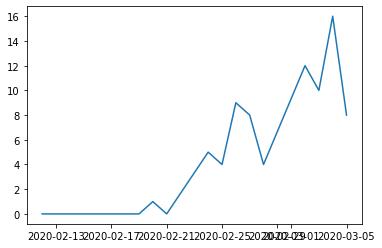

In [136]:
plt.plot(df_m['Date'],df_m['Coronavirus'])
plt.show()